# **Project Information**

**  **
<br>

1.   **Project Name :** News Recommendation System
2.   **Team Members :** 

|             Name             |    Enrollment No.   |
|------------------------------|:--------------------|
| [Jeet D. Shah](https://github.com/jds311) |   AU1841006 |
| [Manav M. Vagrecha](https://github.com/caped-crusader16)  | AU1841022  |
| [Parth N. Patel](https://github.com/parth-27) | AU1841028  |
| [Shreyansh N. Shah](https://github.com/shreyanshshah27)  |   AU1841046   |

3.   **Course Name :** Machine Learning (CSE523)
4.   **Project Description :**
<br>

**  **

# **Back-End Process**

## Import Dataset

Mounting the folder for Dataset

In [2]:
import pandas as pd 
from google.colab import drive

drive.mount('/content/drive/')

url_behavior = '/content/drive/MyDrive/Dataset/MIND dataset/behaviors.tsv'
url_news = '/content/drive/MyDrive/Dataset/MIND dataset/news.tsv'

Mounted at /content/drive/


In [3]:
behavior = pd.read_csv(url_behavior, sep='\t', names=["Index", "User-ID", "Timestamp", "History", "Impressions"])
news = pd.read_csv(url_news, sep='\t', names=["News-ID", "Category", "Sub-Category", "Title", "Abstract", "URL", "Title-Entities", "Abstract-Entities"])


## Data Validation, Cleaning and Preprocessing

### Removing redundant columns in Behaviour Data

In [4]:
# Remove Redundant columns

behav_data = behavior.dropna(axis=0, how='any', inplace=False)
behav_data = behav_data[["User-ID","History","Impressions"]]
behavior_data = behav_data
inde = []
for i in range(len(behavior_data['User-ID'])):
  inde.append(i)
behavior_data['Inde'] = inde
behavior_data = behavior_data.set_index('Inde')
#"Index", "User-ID", "History",

### Removing redundant columns in News Data

In [5]:
news = news.dropna(subset=["News-ID"])
news = news.drop_duplicates(subset=None, keep='first', inplace=False)
news_data = news[["News-ID", "Category", "Sub-Category", "Title", "Abstract"]]

inde = []
for i in range(len(news_data['News-ID'])):
  inde.append(i)
news_data['Inde'] = inde
news_data = news_data.set_index('Inde')  
news_data.head()
# Discard impressions column
# pd.set_option('display.max_colwidth', 10000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,News-ID,Category,Sub-Category,Title,Abstract
Inde,,,,,
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re..."


### Splitting News Articles from History and Impression column

In [6]:
import numpy as np

def split_impressions(strings):
  data = strings.split()
  return data

bd_hist = behavior_data["History"].values.tolist()
bd_imp = behavior_data["Impressions"].values.tolist()

split_hist_final = []
split_imp_final = []
x_final = []
y_final = []
sum_final = []

for i in range(len(bd_hist)):
  split_imp = split_impressions(bd_imp[i])
  split_hist = split_impressions(bd_hist[i])
  x = split_hist
  y = []

  for j in range(len(split_hist)):
    y.append(1)
  
  su = 0
  for temp in split_imp:
    abc = temp.split("-")
    # print(abc)
    x.append(abc[0])
    # #print(abc[0])
    y.append(int(abc[1]))
    #print(abc[1])
  
  # print(x)
  # print(y)

  sum_final.append(sum(y))
  
  x_final.append(x)
  y_final.append(y)
  split_imp_final.append(split_imp)
  split_hist_final.append(split_hist)
# d = split_impressions(bd[17][0])
# for temp in d:
#   print(temp)
# print(len(d))
behavior_data['Split History'] = split_hist_final
behavior_data['Split Impressions'] = split_imp_final
behavior_data['X'] = x_final
behavior_data['Y'] = y_final
behavior_data['1 Counts'] = sum_final

In [7]:
behavior_data = behavior_data[["User-ID","X", "Y", "1 Counts"]]
behavior_data.head()

,User-ID,X,Y,1 Counts
Inde,,,,
0,U13740,"[N55189, N42782, N34694, N45794, N18445, N6330...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]",10
1,U91836,"[N31739, N6072, N63045, N23979, N35656, N43353...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",83
2,U73700,"[N10732, N25792, N7563, N21087, N41087, N5445,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",17
3,U34670,"[N45729, N2203, N871, N53880, N41375, N43142, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]",11
4,U8125,"[N10078, N56514, N14904, N33740, N39985, N3605...","[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",5


### Removing Users with less than 300 interactions

In [8]:
xyz = []
for i in range(len(behavior_data['X'])):
  if(len(behavior_data['X'].iloc[i]) < 300):
    xyz.append(i)
    
update_bd = behavior_data.drop(xyz)
inde = []
for i in range(len(update_bd['User-ID'])):
  inde.append(i)
update_bd['Inde'] = inde
update_bd = update_bd.set_index('Inde')
update_bd.head(5)
# X = np.array(update_bd['Split Impressions'].iloc[0])
#   # create train and test
# tpercent = 0.9
# tsize = int(np.floor(tpercent * len(update_bd['Split Impressions'].iloc[0])))
# bd_train = X[:tsize]
# bd_test = X[tsize:]
# #len of train and test
# lentrain = len(bd_train)
# lentest = len(bd_test)
# # print(lentrain)
# # print(lentest)

# #sum_.sort(reverse=True)
# update_bd
# # print(update_bd['No of ones'])
# # print(len(update_bd.loc[4764,'Split Impressions'])) 
# # update_bd['Split Impressions'].iloc[0]

,User-ID,X,Y,1 Counts
Inde,,,,
0,U89744,"[N24422, N25287, N39121, N41777, N58226, N119,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",80
1,U76446,"[N20100, N65066, N10235, N49745, N53879, N4306...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",77
2,U67455,"[N7432, N55829, N44798, N31457, N61864, N13142...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",280
3,U18588,"[N26136, N43353, N10732, N51483, N20044, N5111...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",287
4,U54826,"[N38688, N3501, N60242, N23402, N45354, N163, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",325


In [9]:
# # For a specific user at index 0
# X = np.array(update_bd['X'].iloc[0])
#   # create train and test
# tpercent = 0.9
# tsize = int(np.floor(tpercent * len(update_bd['X'].iloc[0])))
# bd_train_X = X[:tsize]
# bd_test_X = X[tsize:]
# #len of train and test
# lentrain_X = len(bd_train_X)
# lentest_X = len(bd_test_X)
# print(lentrain_X)
# print(lentest_X)
# max(sum_final)
# count_1 = update_bd['1 Counts'].values.tolist()
# count_1.index(569)
# count` = np.array(update_bd['X'].iloc[len(update_bd['X'])-1])
def get_data_from_index(index):
  X = np.array(update_bd['X'].iloc[index])
  Y = np.array(update_bd['Y'].iloc[index])
  X.size
  return find_indices(X, Y)


### Feature Extraction using One Hot Encoding

* Finding Unique features 
*  Assigning labels to the features
*  Quantization using One Hot Encoding


In [10]:
categories = np.unique(news_data['Category'])
subcategories = np.unique(news_data['Sub-Category'])
features = np.concatenate((categories,subcategories))

In [11]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
feature_labels = gle.fit_transform(features)
feature_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}                 

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# transform and map news categories
cat_le = LabelEncoder()
cat_labels = cat_le.fit_transform(news_data['Category'])
news_data['Cat_Label'] = cat_labels
# transform and map news sub-categories
sub_cat_le = LabelEncoder()
sub_cat_labels = sub_cat_le.fit_transform(news_data['Sub-Category'])
news_data['Sub_Cat_Label'] = sub_cat_labels
news_data_sub = news_data[['News-ID', 'Category', 'Cat_Label', 'Sub-Category', 'Sub_Cat_Label']]
#news_data.iloc[4:10] News-ID	Category	Sub-Category	Title	Abstract
# news_data_sub


In [13]:
# encode category labels using one-hot encoding scheme
cat_ohe = OneHotEncoder()
cat_feature_arr = cat_ohe.fit_transform(news_data[['Cat_Label']]).toarray()
cat_feature_labels = list(cat_le.classes_)
cat_features = pd.DataFrame(cat_feature_arr, columns=cat_feature_labels)
# encode legendary status labels using one-hot encoding scheme
sub_cat_ohe = OneHotEncoder()
sub_cat_feature_arr = sub_cat_ohe.fit_transform(news_data[['Sub_Cat_Label']]).toarray()
sub_cat_feature_labels = list(sub_cat_le.classes_)
sub_cat_features = pd.DataFrame(sub_cat_feature_arr, columns=sub_cat_feature_labels)
cat_feature_labels

['autos',
 'entertainment',
 'finance',
 'foodanddrink',
 'health',
 'kids',
 'lifestyle',
 'middleeast',
 'movies',
 'music',
 'news',
 'northamerica',
 'sports',
 'travel',
 'tv',
 'video',
 'weather']

In [14]:
news_data_ohe = pd.concat([cat_features, sub_cat_features], axis=1)
# columns = sum([['News-ID', 'Category', 'Cat_Label'],   
#                cat_feature_labels, ['Sub-Category','Sub_Cat_Label'], 
#                sub_cat_feature_labels], [])
news_data_ohe.head()
# News-ID	Category	Sub-Category	Title	Abstract

,autos,entertainment,finance,foodanddrink,health,kids,lifestyle,middleeast,movies,music,news,northamerica,sports,travel,tv,video,weather,ads-latingrammys,ads-lung-health,advice,animals,autosbuying,autoscartech,autosclassics,autoscompact,autosenthusiasts,autoshybrids,autoslosangeles,autosluxury,autosmidsize,autosmotorcycles,autosnews,autosownership,autospassenger,autosresearch,autosresearchguides,autosreview,autossema,autossports,autossuvs,...,sports_news,strength,technologyinvesting,tennis,tennis_intl,tipsandtricks,topnews,travel,travel-adventure-travel,travel-points-rewards,travel-videos,travelarticle,travelnews,traveltips,traveltripideas,traveltrivia,tunedin,tv,tv-celebrity,tv-gallery,tv-golden-globes,tv-golden-globes-video,tv-recaps,tv-reviews,tvnews,tvvideos,ustravel,video,videos,viral,voices,watch,weatherfullscreenmaps,weathertopstories,weight-loss,weightloss,wellness,wines,wonder,yearinoffbeatgoodnews
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
def find_indices(x,y):
  indices = []
  for i in x:
    for j in range(len(news_data['News-ID'])):
      if(i == news_data['News-ID'].iloc[j]):
        indices.append(j)
        break
  return split_test_train(indices,y)      

## Training Testing Data Split

In [16]:
def split_test_train(indices,Y):
  from sklearn.model_selection import train_test_split
  X_features = []
  for i in indices:
    X_features.append(news_data_ohe.loc[i].values.flatten().tolist())
  X_train , X_test , y_train , y_test = train_test_split(X_features , Y , test_size = 0.2, random_state = 24)
  return grid_search(X_train ,y_train , X_test ,  y_test)
  #print(show_recommendations("U85744", X_train, y_train))



## Model Training

In [ ]:
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# def run_SVC(typeOfKernel, degree=2, C=50, gamma=0.01, Xtrain = X_train, ytrain = y_train, Xtest = X_test):
#   if typeOfKernel == 'linear':
#     svcclassifier = SVC(kernel='linear')
#   elif typeOfKernel == 'poly':
#     svcclassifier = SVC(kernel='poly', degree=degree, C=C, gamma=gamma)
#   elif typeOfKernel == 'rbf':
#     svcclassifier = SVC(kernel='rbf', C=C, gamma=gamma)
#   svcclassifier.fit(Xtrain, ytrain)
#   return svcclassifier.predict(Xtest);

# def disp_report(typeOfKernel, ytest , ypred):
#   print("Accuracy:", accuracy_score(ytest, ypred))
#   results[typeOfKernel] = accuracy_score(ytest, ypred)
#   print("Report: ")
#   print(classification_report(ytest, ypred))

In [ ]:
# results={}

In [ ]:
# y_pred_lin = run_SVC('linear', Xtrain = X_train,ytrain = y_train, Xtest = X_test)
# disp_report('linear', y_test, y_pred_lin)

In [ ]:
# y_pred_poly = run_SVC('poly', 2, 2, 0.1, Xtrain = X_train,ytrain = y_train, Xtest = X_test)
# disp_report('poly', y_test, y_pred_poly)

In [ ]:
# y_pred_rbf = run_SVC('rbf',C = 50, gamma = 0.01, Xtrain = X_train,ytrain = y_train, Xtest = X_test)
# disp_report('rbf', y_test, y_pred_poly)

### Applying Grid Search algo to get best set of features for the best results.

In [17]:
def grid_search(X_train,y_train,X_test,y_test):
  from sklearn.svm import SVC
  from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix
  from sklearn.model_selection import GridSearchCV, ParameterGrid
  import matplotlib.pyplot as plt
  
  param_grid = [{'kernel': ['linear']}, {'kernel': ['poly','rbf'], 'C': [0.1,1,2,4,8,16,32,50,64,100,1000],'degree' :  [2, 3, 4],
  'gamma': [0.0001,0.001,0.005,0.01,0.1, 1, 3, 5]}]
  print("Total length to check for best model and parameters: ",len(list(ParameterGrid(param_grid))))
  gsc = GridSearchCV(SVC(),param_grid,scoring='accuracy',cv=5)
  grid_result = gsc.fit(X_train, y_train)
  print("Best Parameters: ", grid_result.best_params_)
  print("Best Estimator: ", grid_result.best_estimator_)
  print("Best Score: ", grid_result.best_score_)
  y_pred = grid_result.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  classreport = classification_report(y_test, y_pred)
  print("Accuracy:", acc)
  print("Classification Report: ")
  print(classreport)
  print("Confusion Matrix: ")
  confus_mat = confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(gsc, X_test, y_test)
  plt.show()
  # show_recommendations()
  return acc

Total length to check for best model and parameters:  529
Best Parameters:  {'C': 64, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Best Estimator:  SVC(C=64, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best Score:  0.8864296081277214
Accuracy: 0.9090909090909091
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.92      0.98      0.95        61

    accuracy                           0.91        66
   macro avg       0.46      0.49      0.48        66
weighted avg       0.85      0.91      0.88        66

Confusion Matrix: 


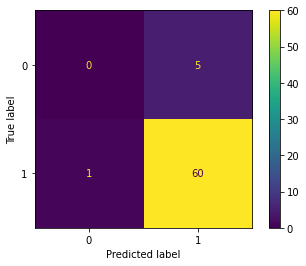

Total length to check for best model and parameters:  529
Best Parameters:  {'C': 0.1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
Best Estimator:  SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.0001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best Score:  0.9326274509803921
Accuracy: 0.8888888888888888
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.89      1.00      0.94        56

    accuracy                           0.89        63
   macro avg       0.44      0.50      0.47        63
weighted avg       0.79      0.89      0.84        63

Confusion Matrix: 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


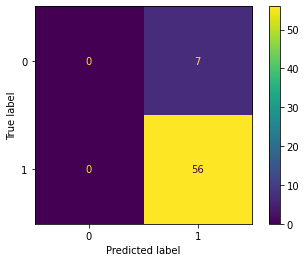

Total length to check for best model and parameters:  529
Best Parameters:  {'C': 64, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Best Estimator:  SVC(C=64, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best Score:  0.7284013605442177
Accuracy: 0.7049180327868853
Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        44
           1       0.43      0.18      0.25        17

    accuracy                           0.70        61
   macro avg       0.58      0.54      0.53        61
weighted avg       0.65      0.70      0.66        61

Confusion Matrix: 


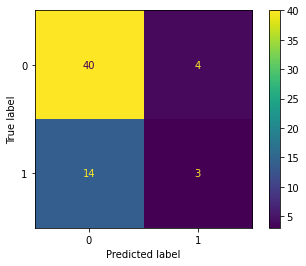

Total length to check for best model and parameters:  529
Best Parameters:  {'C': 0.1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
Best Estimator:  SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.0001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best Score:  0.8396358543417367
Accuracy: 0.8113207547169812
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.81      1.00      0.90        86

    accuracy                           0.81       106
   macro avg       0.41      0.50      0.45       106
weighted avg       0.66      0.81      0.73       106

Confusion Matrix: 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


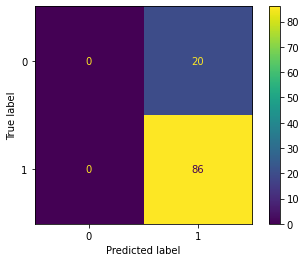

Total length to check for best model and parameters:  529
Best Parameters:  {'C': 8, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Best Estimator:  SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best Score:  0.6573333333333334
Accuracy: 0.6349206349206349
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.26      0.34        23
           1       0.67      0.85      0.75        40

    accuracy                           0.63        63
   macro avg       0.58      0.56      0.55        63
weighted avg       0.61      0.63      0.60        63

Confusion Matrix: 


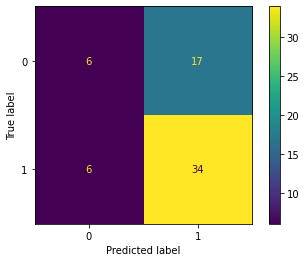

Total length to check for best model and parameters:  529
Best Parameters:  {'C': 0.1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
Best Estimator:  SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.0001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best Score:  0.8665191146881288
Accuracy: 0.8409090909090909
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.84      1.00      0.91        74

    accuracy                           0.84        88
   macro avg       0.42      0.50      0.46        88
weighted avg       0.71      0.84      0.77        88

Confusion Matrix: 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


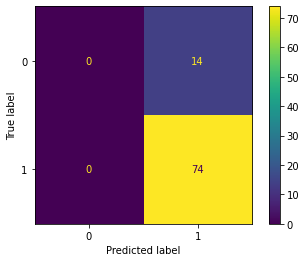

Total length to check for best model and parameters:  529
Best Parameters:  {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
Best Estimator:  SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best Score:  0.9433469387755101
Accuracy: 0.9354838709677419
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        57
           1       1.00      0.20      0.33         5

    accuracy                           0.94        62
   macro avg       0.97      0.60      0.65        62
weighted avg       0.94      0.94      0.92        62

Confusion Matrix: 


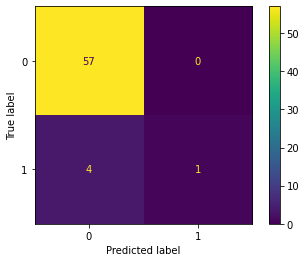

Total length to check for best model and parameters:  529


In [ ]:
output = []
for i in range(60,85):
  output.append(get_data_from_index(i))
# avg_acc = sum(accu)/len(accu)
# avg_acc

In [ ]:
sumx = 0;

for i in len(output):
  sumx += output[i]

avgg = sumx / len(output);

In [26]:
# show recommendation function
def show_recommendations(user_id, X_train, y_train):
  from sklearn.svm import SVC
  from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix
  from sklearn.model_selection import GridSearchCV, ParameterGrid
  import matplotlib.pyplot as plt

  param_grid = [{'kernel': ['linear']}, {'kernel': ['poly','rbf'], 'C': [0.1,1,2,4,8,16,32,50,64,100,1000],'degree' :  [2, 3, 4],
  'gamma': [0.0001,0.001,0.005,0.01,0.1, 1, 3, 5]}]

  listX = update_bd['X'].where(update_bd['User-ID']==user_id)
  new_set = []
  listArticles = news_data['News-ID'].tolist();
  
  countRec = 0
  for i in listArticles:
  
    if(countRec > 10):
      break
  
    if not (i in listX):
      X_test = i
      grid_search(X_train, y_train, X_test, 1)
      print("Total length to check for best model and parameters: ",len(list(ParameterGrid(param_grid))))
      gsc = GridSearchCV(SVC(),param_grid,scoring='accuracy',cv=5)
      grid_result = gsc.fit(X_train, y_train)
      print("Best Parameters: ", grid_result.best_params_)
      print("Best Estimator: ", grid_result.best_estimator_)
      print("Best Score: ", grid_result.best_score_)
      y_pred = grid_result.predict(X_test)
      if(y_pred == 1):
        print(i)
        countRec +=1
       

                               

Total length to check for best model and parameters:  529
Best Parameters:  {'C': 2, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimator:  SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best Score:  0.8274509803921568
Accuracy: 0.6875
Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        46
           1       0.42      0.28      0.33        18

    accuracy                           0.69        64
   macro avg       0.58      0.56      0.56        64
weighted avg       0.66      0.69      0.67        64

Confusion Matrix: 


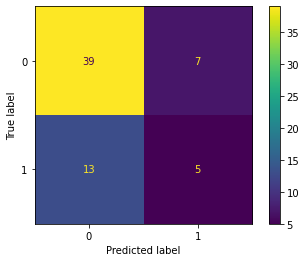

0.6875

In [27]:
#get_data_from_index(0)

## Using SGD classifier


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

param_grid = [{ 'loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron','squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                'penalty' : ['l1', 'l2'],
                'l1_ratio' : [0, 0.1, 0.2, 0.5, 0.75, 1],
                'max_iter': [100, 200, 500, 800, 1000, 1200, 1500, 1750, 2000, 3000, 5000, 10000, 20000],
                'alpha': [0.0001, 0.001, 0.005, 0.01, 0.2 , 0.1, 1, 2, 5, 10, 20 , 50],
                'tol':[0.005, 0.003, 0.0025, 0.002, 0.00175, 0.0015, 0.00125, 0.001, 0.01, 0.1, 1]
}]
print("Total length to check for best model and parameters: ",len(list(ParameterGrid(param_grid))))
gsc = GridSearchCV(SGDClassifier(),param_grid,scoring='accuracy')
grid_result = gsc.fit(X_train, y_train)
print("Best Parameters: ", grid_result.best_params_)
print("Best Estimator: ", grid_result.best_estimator_)
print("Best Score: ", grid_result.best_score_)
y_pred = grid_result.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))

In [ ]:
classifierX = make_pipeline(StandardScaler(),SGDClassifier(max_iter=10000,  alpha=10, tol=5e-3))
classifierX.fit(X_train, y_train)

y_pred_sgd = classifierX.decision_function(X_test)

for i in range(len(y_pred_sgd)):
  if (y_pred_sgd[i] > 0):
    y_pred_sgd[i] = 1;
  else:
    y_pred_sgd[i] = 0;


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_sgd))
print("Classification Report: ")
print(classification_report(y_test, y_pred_sgd))

# **User Perspective**

## User Info

In [ ]:
user_id = input("Please enter your user-id : ")

if user_id in behaviour_data.User-Id:
      print("Welcome again" +user_id)
      start_point(user_id);
else :
      print("Apologies.. we currently won't register any new user");